In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple

def load_and_clean_data(file_path: str) -> pd.DataFrame:
    """
    Load TSV file and clean the data.

    Args:
        file_path (str): Path to the TSV file.

    Returns:
        pd.DataFrame: Cleaned DataFrame.

    Raises:
        FileNotFoundError: If the specified file is not found.
        pd.errors.EmptyDataError: If the file is empty.
    """
    try:
        df = pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {file_path}")
    except pd.errors.EmptyDataError:
        raise pd.errors.EmptyDataError("The file is empty.")

    # Remove columns starting with "Unnamed"
    df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

    # Remove "ID" column
    df = df.drop(columns=['ID'], errors='ignore')

    # Split "Program and Plan" column
    if 'Program and Plan' in df.columns:
        df[['Program', 'Plan']] = df['Program and Plan'].str.split('- \n\n', expand=True)
        df = df.drop(columns=['Program and Plan'])

    return df

def create_distribution_plot(df: pd.DataFrame, column: str, title: str, order: list = None) -> None:
    """
    Create a distribution plot for the specified column.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column name to plot.
        title (str): Plot title.
        order (list, optional): Order of categories for x-axis. Defaults to None.
    """
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column, data=df, order=order)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    # Rotate x-axis labels if they are too long
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def process_class_data(file_path: str) -> Tuple[pd.DataFrame, None, None]:
    """
    Process class data from TSV file and generate visualizations.

    Args:
        file_path (str): Path to the TSV file.

    Returns:
        Tuple[pd.DataFrame, None, None]: Cleaned DataFrame and two None values (for consistency with visualization calls).
    """
    df = load_and_clean_data(file_path)

    # Create distribution plot for "Plan" values
    create_distribution_plot(df, 'Plan', 'Distribution of Plans')

    # Create distribution plot for "Level" values
    level_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
    create_distribution_plot(df, 'Level', 'Distribution of Levels', order=level_order)

    return df, None, None

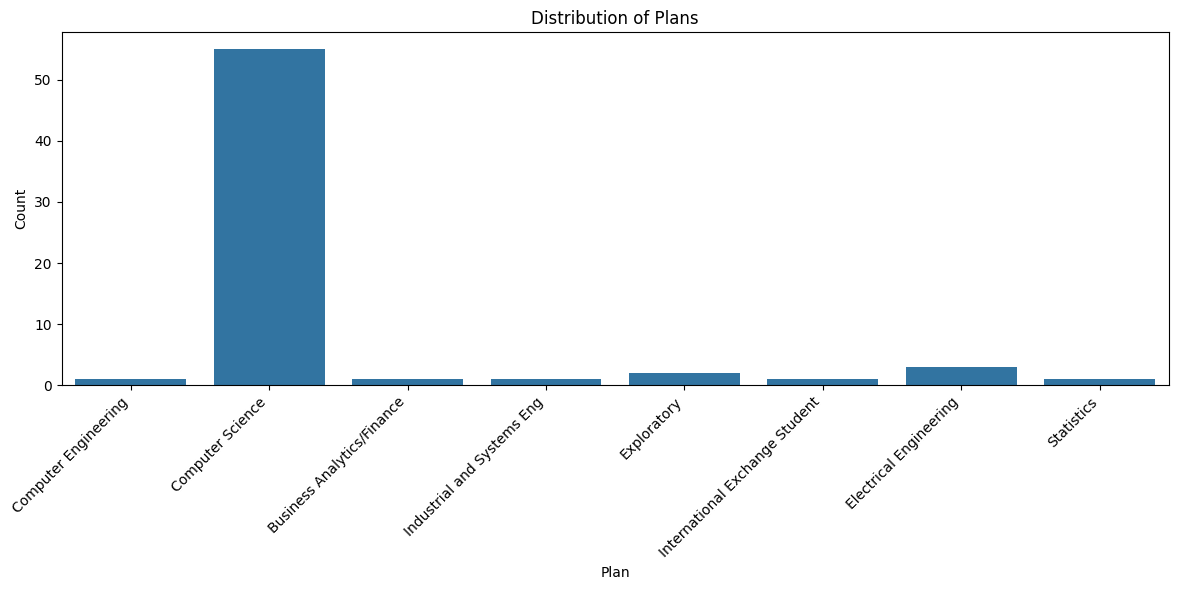

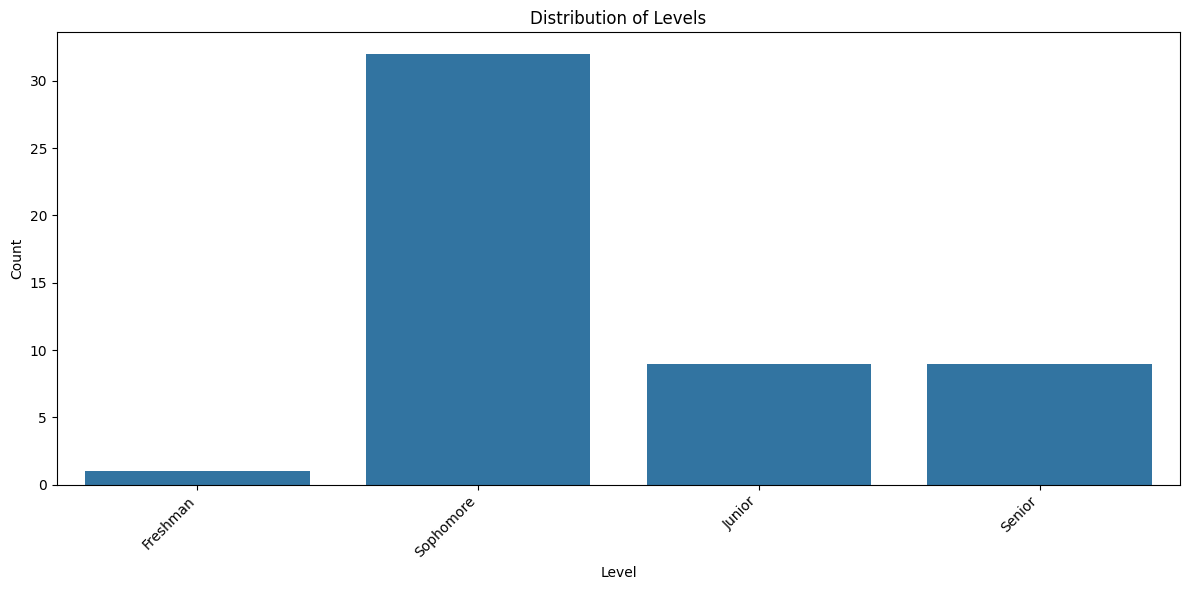

Data processing and visualization completed successfully.
Processed DataFrame shape: (65, 3)


In [3]:

file_path = '20CS2023-FS24-class-data.tsv'
try:
    df, _, _ = process_class_data(file_path)
    print("Data processing and visualization completed successfully.")
    print(f"Processed DataFrame shape: {df.shape}")
except Exception as e:
    print(f"An error occurred: {str(e)}")